In [298]:
#Import librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# **Data Read and Check**

In [299]:
data='/content/drive/MyDrive/Finanzas/Modelos de Suavizacion/desempleo.csv'

In [300]:
data=pd.read_csv(data,sep=';')

In [301]:
data=pd.DataFrame(data)

In [302]:
print("Numero de filas y columnas del train es :", data.shape,end='\n')

Numero de filas y columnas del train es : (182, 2)


In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fecha           182 non-null    object 
 1   tasa_desempleo  182 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [304]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tasa_desempleo,182.0,8.0049,1.658295,4.847096,6.818568,8.050925,9.196869,13.001669


In [305]:
data['fecha']=pd.to_datetime(data['fecha'],format='%d/%m/%Y')

In [306]:
data=data.set_index('fecha')

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 2004-11-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tasa_desempleo  182 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [308]:
#no presenta nulos
data.isnull().sum()

tasa_desempleo    0
dtype: int64

In [309]:
data.isnull().sum().sum()

0

In [310]:
data.columns

Index(['tasa_desempleo'], dtype='object')

## **EDA**

In [311]:
#La tasa de desempleo comienza caer desde el 2010 en adelante
import plotly.express as px
fig=px.line(data,x=data.index,y='tasa_desempleo',title='Grafica Lineal de Desempleo',template='plotly_dark')
fig.show()

In [312]:
fig=px.histogram(data,x='tasa_desempleo',title='Histograma de Ventas',template='plotly_dark',nbins=100,opacity=0.5,color_discrete_sequence=['indianred'])
fig.show()

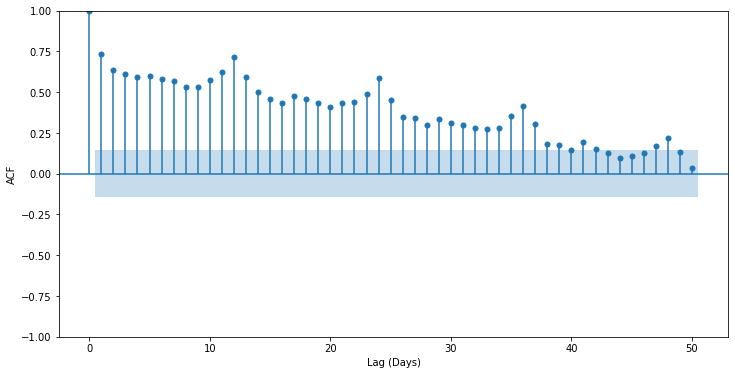

In [313]:
# import the plotting functions for act and pacf  
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,ax=plt.subplots(figsize=(12,6))
plot_acf(data['tasa_desempleo'],lags=50,title=None,bartlett_confint=False,ax=ax)
plt.ylabel('ACF')
plt.xlabel('Lag (Days)')
plt.show()

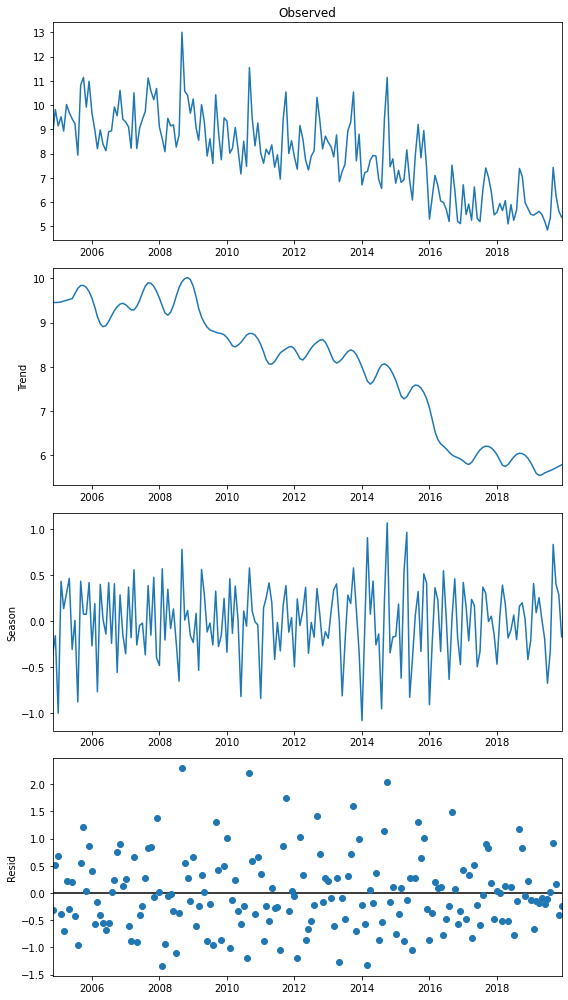

In [314]:
from statsmodels.tsa.seasonal import STL
import matplotlib as mpl
stl_model = STL(data[["tasa_desempleo"]], period=7, seasonal=7).fit()
with mpl.rc_context():
    mpl.rc("figure", figsize=(8, 14))
    stl_model.plot()
    plt.tight_layout()

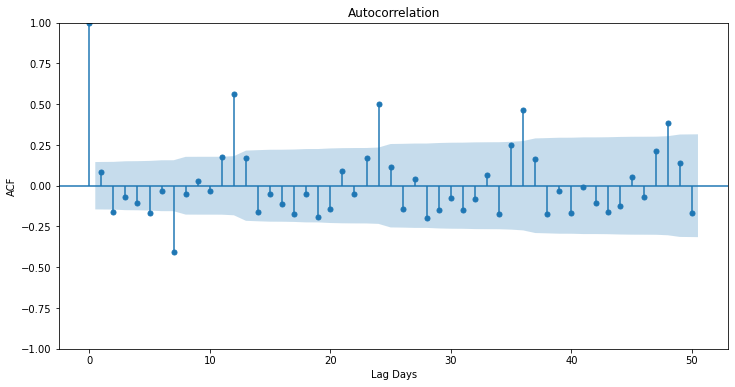

In [315]:
#Residuos
fig,ax=plt.subplots(figsize=(12,6))
plot_acf(stl_model.resid.dropna(),lags=50,ax=ax)
plt.ylabel('ACF')
plt.xlabel('Lag Days')
plt.show()

# **TimeSeriesSplit**

In [316]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 14)

In [317]:
X=data.drop(labels=['tasa_desempleo'],axis=1)
y=data['tasa_desempleo']

In [318]:
X

""
fecha
2004-11-01
2004-12-01
2005-01-01
2005-02-01
2005-03-01
...
2019-08-01
2019-09-01
2019-10-01


In [319]:
y

fecha
2004-11-01    8.785895
2004-12-01    9.815733
2005-01-01    9.140379
2005-02-01    9.517384
2005-03-01    8.928555
                ...   
2019-08-01    5.352432
2019-09-01    7.429836
2019-10-01    6.276008
2019-11-01    5.625253
2019-12-01    5.373628
Name: tasa_desempleo, Length: 182, dtype: float64

In [320]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [321]:
print(X_train.shape,y_train.shape)
print('------------')
print(X_test.shape, y_test.shape)

(170, 0) (170,)
------------
(12, 0) (12,)


In [322]:
Años=pd.DataFrame(y_train).tasa_desempleo
Desempleo=pd.DataFrame(y_train).index

In [323]:
fig=px.line(x=Desempleo,y=Años,template='plotly_dark',title='Desempleo')
fig.show()

In [324]:
Años_1=pd.DataFrame(y_test).index
Desempleo_1=pd.DataFrame(y_test).tasa_desempleo

In [325]:
fig=px.line(x=Años_1,y=Desempleo_1,template='plotly_dark')
fig.show()

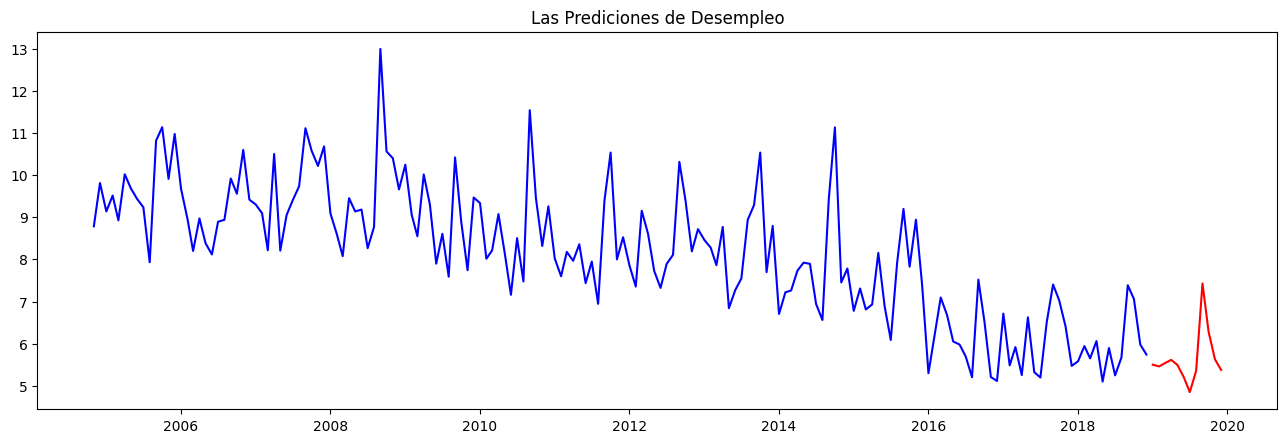

In [326]:
plt.figure(figsize = (16,5), dpi=100)
plt.plot(pd.DataFrame(y_train).index, pd.DataFrame(y_train).tasa_desempleo, color="blue")
plt.plot(pd.DataFrame(y_test).index, pd.DataFrame(y_test).tasa_desempleo, color = "red")
plt.title('Las Prediciones de Desempleo')
plt.show()

# **Modelos de Suavización**

## **Modelo de Suavizacion Exponencial Simple**

In [327]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [328]:
model_ses=SimpleExpSmoothing(y_train)
results_sex=model_ses.fit(smoothing_level=0.2,optimized=True)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [329]:
print(results_sex.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:         tasa_desempleo   No. Observations:                  170
Model:             SimpleExpSmoothing   SSE                            185.758
Optimized:                       True   AIC                             19.070
Trend:                           None   BIC                             25.342
Seasonal:                        None   AICC                            19.313
Seasonal Periods:                None   Date:                 Wed, 22 Mar 2023
Box-Cox:                        False   Time:                         19:18:24
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
initial_level              9.3646134                

In [330]:
#Realiza las prediciones para los ultimos 12 periodos del tiempo
forecast_ses=results_sex.forecast(12).rename("forescast alpha=0.9")

In [331]:
y_test_plot=y_test
y_test.index=forecast_ses.index

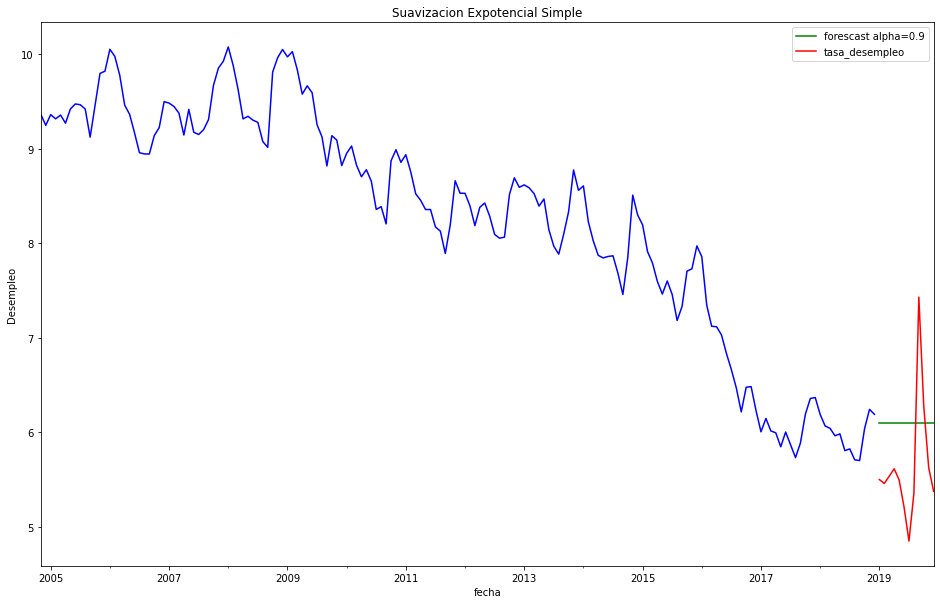

In [332]:
plt.figure(figsize = (16,10))
forecast_ses.plot(color = "green", legend = True)
results_sex.fittedvalues.plot(color = "blue")
y_test_plot.plot(color = "red", legend = True)
plt.title('Suavizacion Expotencial Simple')
plt.ylabel('Desempleo')
plt.show()

In [333]:
from sklearn.metrics import mean_squared_error

In [334]:
error=mean_squared_error(y_test_plot,forecast_ses)
print("El MEAN SQUARED ERROR :",error.round(4))

El MEAN SQUARED ERROR : 0.597


In [335]:
#residuos
residuals=results_sex.resid
print(residuals)

fecha
2004-11-01   -0.578718
2004-12-01    0.566863
2005-01-01   -0.221864
2005-02-01    0.199515
2005-03-01   -0.429218
                ...   
2018-08-01   -0.037947
2018-09-01    1.686191
2018-10-01    1.022810
2018-11-01   -0.263815
2018-12-01   -0.448699
Length: 170, dtype: float64


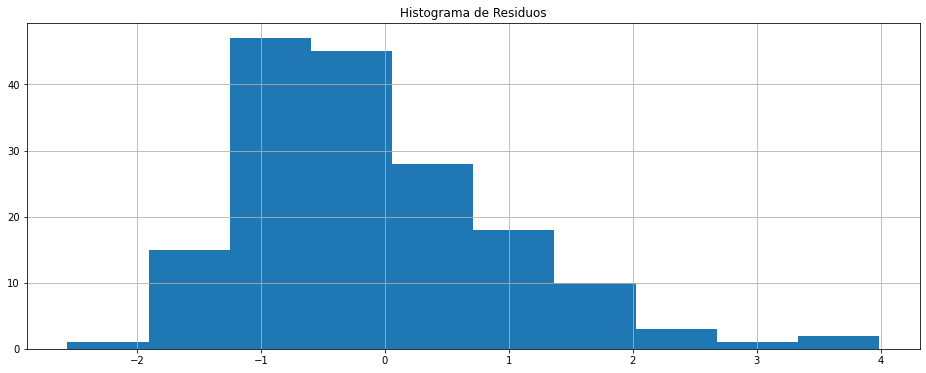

In [336]:
plt.figure(figsize = (16,6))
plt.title('Histograma de Residuos')
residuals.hist()
plt.show()

In [337]:
import scipy.stats as stats
from matplotlib import pylab
from pylab import *

((array([-2.64628713, -2.33103129, -2.15080987, -2.0214741 , -1.91911161,
         -1.83362478, -1.75975585, -1.69440309, -1.63557669, -1.58192053,
         -1.53246709, -1.48650077, -1.44347676, -1.40297023, -1.36464321,
         -1.32822219, -1.29348255, -1.26023745, -1.22832972, -1.19762582,
         -1.16801127, -1.13938714, -1.11166731, -1.08477636, -1.05864777,
         -1.03322264, -1.00844845, -0.98427825, -0.9606698 , -0.937585  ,
         -0.91498935, -0.89285146, -0.87114273, -0.84983698, -0.8289102 ,
         -0.80834027, -0.78810682, -0.76819099, -0.74857529, -0.7292435 ,
         -0.71018047, -0.69137211, -0.6728052 , -0.65446739, -0.63634707,
         -0.61843333, -0.60071589, -0.58318505, -0.56583164, -0.54864699,
         -0.53162285, -0.51475142, -0.49802527, -0.4814373 , -0.46498076,
         -0.4486492 , -0.43243644, -0.41633657, -0.4003439 , -0.38445298,
         -0.36865856, -0.35295558, -0.33733916, -0.32180459, -0.30634729,
         -0.29096284, -0.27564696, -0.

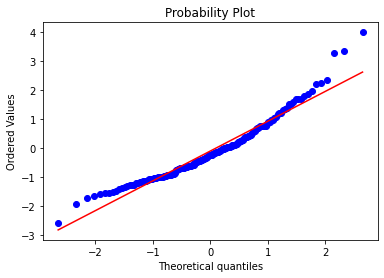

In [338]:
stats.probplot(residuals, dist="norm", plot = pylab)

## **Suavización Exponencial Doble**

In [339]:
model_sed=Holt(y_train)
##results_sed = model_sed.fit(smoothing_level = 0.6, smoothing_slope = 0.3)
results_sed = model_sed.fit(optimized = True)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [340]:
#Realiza las prediciones para los ultimos 12 periodos del tiempo
forecast_sed=results_sed.forecast(12).rename("Tendencia Linea Holt")

In [341]:
pred=results_sed.predict()

In [342]:
print(results_sed.summary())

                              Holt Model Results                              
Dep. Variable:         tasa_desempleo   No. Observations:                  170
Model:                           Holt   SSE                            180.080
Optimized:                       True   AIC                             17.792
Trend:                       Additive   BIC                             30.335
Seasonal:                        None   AICC                            18.308
Seasonal Periods:                None   Date:                 Wed, 22 Mar 2023
Box-Cox:                        False   Time:                         19:18:26
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0910968                alpha                 True
smoothing_trend           5.1353e-13                

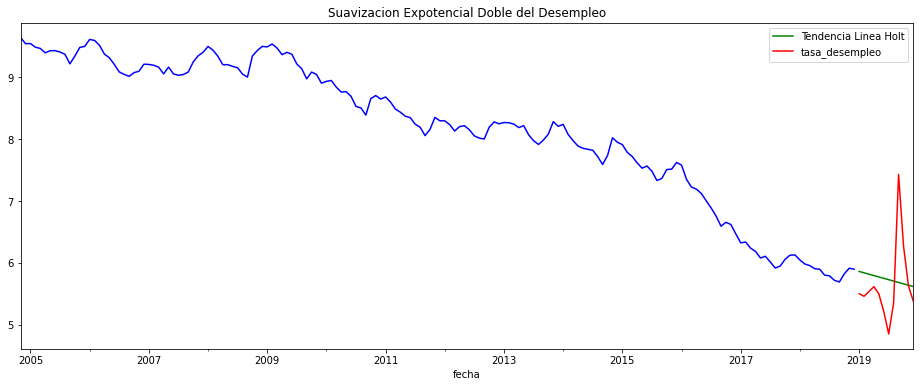

In [343]:
plt.figure(figsize=(16,6))
forecast_sed.plot(color='green',legend=True)
results_sed.fittedvalues.plot(color='blue')
y_test_plot.plot(color='red',legend=True)
plt.title('Suavizacion Expotencial Doble del Desempleo')
plt.show()

In [344]:
error=mean_squared_error(y_test_plot,forecast_sed)
print("El MEAN SQUARED ERROR :",error.round(4))

El MEAN SQUARED ERROR : 0.4285


In [345]:
#residuos
residuals=results_sed.resid
print(residuals)

fecha
2004-11-01   -0.860182
2004-12-01    0.270291
2005-01-01   -0.407410
2005-02-01    0.028985
2005-03-01   -0.540209
                ...   
2018-08-01   -0.045735
2018-09-01    1.697256
2018-10-01    1.238774
2018-11-01    0.066138
2018-12-01   -0.155258
Length: 170, dtype: float64


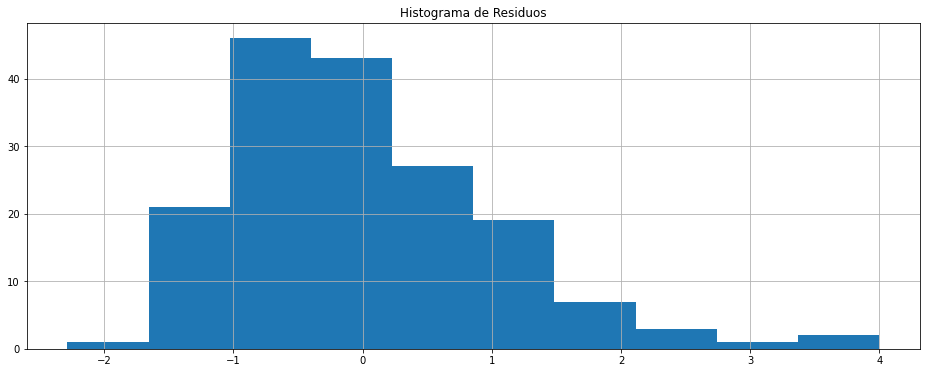

In [346]:
plt.figure(figsize = (16,6))
plt.title('Histograma de Residuos')
residuals.hist()
plt.show()

((array([-2.64628713, -2.33103129, -2.15080987, -2.0214741 , -1.91911161,
         -1.83362478, -1.75975585, -1.69440309, -1.63557669, -1.58192053,
         -1.53246709, -1.48650077, -1.44347676, -1.40297023, -1.36464321,
         -1.32822219, -1.29348255, -1.26023745, -1.22832972, -1.19762582,
         -1.16801127, -1.13938714, -1.11166731, -1.08477636, -1.05864777,
         -1.03322264, -1.00844845, -0.98427825, -0.9606698 , -0.937585  ,
         -0.91498935, -0.89285146, -0.87114273, -0.84983698, -0.8289102 ,
         -0.80834027, -0.78810682, -0.76819099, -0.74857529, -0.7292435 ,
         -0.71018047, -0.69137211, -0.6728052 , -0.65446739, -0.63634707,
         -0.61843333, -0.60071589, -0.58318505, -0.56583164, -0.54864699,
         -0.53162285, -0.51475142, -0.49802527, -0.4814373 , -0.46498076,
         -0.4486492 , -0.43243644, -0.41633657, -0.4003439 , -0.38445298,
         -0.36865856, -0.35295558, -0.33733916, -0.32180459, -0.30634729,
         -0.29096284, -0.27564696, -0.

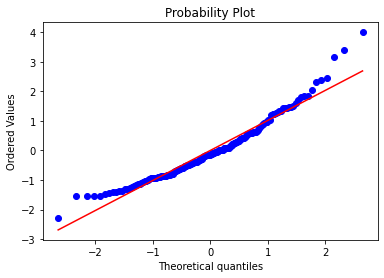

In [347]:
stats.probplot(residuals, dist="norm", plot = pylab)

## **Suavización Exponencial Triple Holt-Winter**

In [348]:
#tendecia additivo 
model_shw=ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='add')

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [349]:
results_shw=model_shw.fit()

In [350]:
print(results_shw.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:           tasa_desempleo   No. Observations:                  170
Model:             ExponentialSmoothing   SSE                             84.111
Optimized:                         True   AIC                            -87.622
Trend:                         Additive   BIC                            -37.450
Seasonal:                      Additive   AICC                           -83.093
Seasonal Periods:                    12   Date:                 Wed, 22 Mar 2023
Box-Cox:                          False   Time:                         19:18:27
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1499055                alpha                 True
smoothing_trend          

In [351]:
forecast_shw=results_shw.forecast(12).rename('Forecast Holt-Winters')

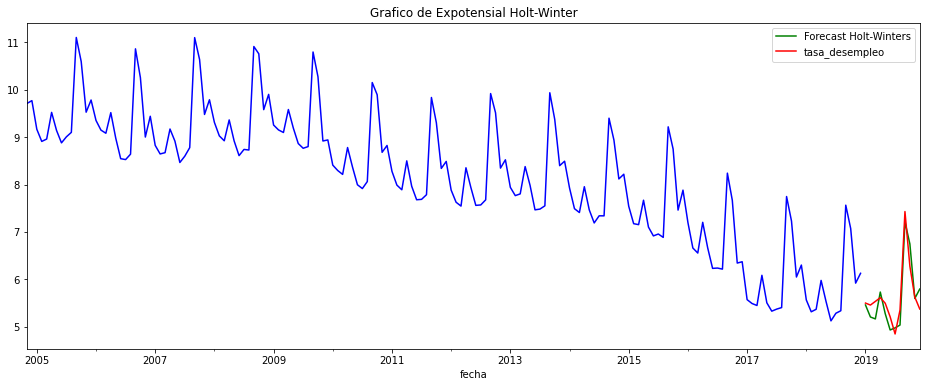

In [352]:
plt.figure(figsize=(16,6))
forecast_shw.plot(color='green',legend=True)
results_shw.fittedvalues.plot(color='blue')
y_test_plot.plot(color='red',legend=True)
plt.title('Grafico de Expotensial Holt-Winter')
plt.show()

In [353]:
error3 = mean_squared_error(y_test_plot, forecast_shw)
error3.round(4)

0.0754

In [354]:
#residuos
residuals=results_shw.resid
print(residuals)

fecha
2004-11-01   -0.924420
2004-12-01    0.045502
2005-01-01   -0.025778
2005-02-01    0.607885
2005-03-01   -0.031463
                ...   
2018-08-01    0.332283
2018-09-01   -0.178224
2018-10-01   -0.011300
2018-11-01    0.058021
2018-12-01   -0.386815
Length: 170, dtype: float64


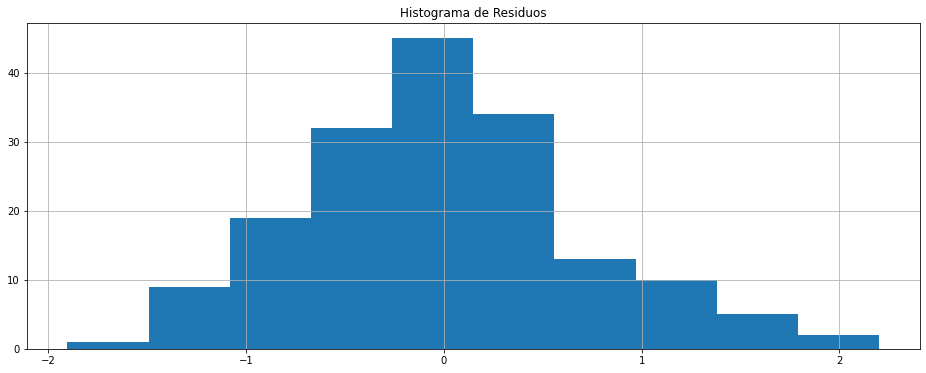

In [355]:
plt.figure(figsize = (16,6))
plt.title('Histograma de Residuos')
residuals.hist()
plt.show()

((array([-2.64628713, -2.33103129, -2.15080987, -2.0214741 , -1.91911161,
         -1.83362478, -1.75975585, -1.69440309, -1.63557669, -1.58192053,
         -1.53246709, -1.48650077, -1.44347676, -1.40297023, -1.36464321,
         -1.32822219, -1.29348255, -1.26023745, -1.22832972, -1.19762582,
         -1.16801127, -1.13938714, -1.11166731, -1.08477636, -1.05864777,
         -1.03322264, -1.00844845, -0.98427825, -0.9606698 , -0.937585  ,
         -0.91498935, -0.89285146, -0.87114273, -0.84983698, -0.8289102 ,
         -0.80834027, -0.78810682, -0.76819099, -0.74857529, -0.7292435 ,
         -0.71018047, -0.69137211, -0.6728052 , -0.65446739, -0.63634707,
         -0.61843333, -0.60071589, -0.58318505, -0.56583164, -0.54864699,
         -0.53162285, -0.51475142, -0.49802527, -0.4814373 , -0.46498076,
         -0.4486492 , -0.43243644, -0.41633657, -0.4003439 , -0.38445298,
         -0.36865856, -0.35295558, -0.33733916, -0.32180459, -0.30634729,
         -0.29096284, -0.27564696, -0.

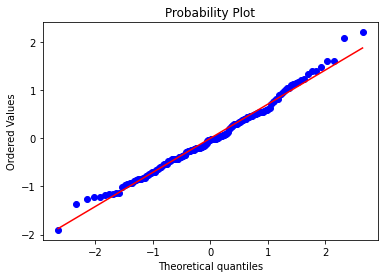

In [356]:
stats.probplot(residuals, dist="norm", plot = pylab)